# Coleta de dados

In [16]:
# #TODO Teste de aderência para saber se provém de uma distribuição específica 
# #TODO medidas estatísticas utilizando testes de hipótese paramétricos ou não paramétricos
# #TODO modelo de regressão entre duas variáveis com correlação linear significativa

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [18]:
dataset = pd.read_csv("datasets/clean_df.csv")
dataset.drop("Unnamed: 0", axis=1, inplace=True)

In [19]:
dataset.dtypes

order_id                          object
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
order_item_id                      int64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
review_id                         object
review_score                       int64
review_creation_date              object
review_answer_timestamp           object
product_category_name             object
product_name_lenght              float64
product_descript

In [20]:
dataset.shape

(97328, 55)

## Tendência Central

In [21]:
print("Moda reviews: ", statistics.mode(dataset["review_score"]))
print("Mediana reviews: ", statistics.median(dataset["review_score"]))
print("Média reviews: ", statistics.mean(dataset["review_score"]))
print("Média Geométrica reviews: ", statistics.geometric_mean(dataset["review_score"]))

Moda reviews:  5
Mediana reviews:  5.0
Média reviews:  4.106814072003945
Média Geométrica reviews:  3.7366566475608702


In [22]:
print("Moda preço: ", statistics.mode(dataset["price"]))
print("Mediana preço: ", statistics.median(dataset["price"]))
print("Média preço: ", statistics.mean(dataset["price"]))
print("Média Geométrica preço: ", statistics.geometric_mean(dataset["price"]))

Moda preço:  59.9
Mediana preço:  79.0
Média preço:  125.96333460052605
Média Geométrica preço:  78.2357395502889


In [23]:
print("Moda frete: ", statistics.mode(dataset["freight_value"]))
print("Mediana frete: ", statistics.median(dataset["freight_value"]))
print("Média frete: ", statistics.mean(dataset["freight_value"]))
#print("Média Geométrica frete: ", statistics.geometric_mean(dataset["freight_value"]))

Moda frete:  15.1
Mediana frete:  16.36
Média frete:  20.19959004602992


In [24]:
print("Moda atraso: ", statistics.mode(dataset["days_late"]))
print("Mediana atraso: ", statistics.median(dataset["days_late"]))
print("Média atraso: ", statistics.mean(dataset["days_late"]))
#print("Média Geométrica atraso: ", statistics.geometric_mean(dataset["days_late"]))

Moda atraso:  -14
Mediana atraso:  -12.0
Média atraso:  -11.698134144336676


In [25]:
print("Moda delivery: ", statistics.mode(dataset["delivery_days"]))
print("Mediana delivery: ", statistics.median(dataset["delivery_days"]))
print("Média delivery: ", statistics.mean(dataset["delivery_days"]))
#print("Média Geométrica frete: ", statistics.geometric_mean(dataset["delivery_days"]))

Moda delivery:  6
Mediana delivery:  7.0
Média delivery:  8.577141213217162


## Medidas de Dispersão

In [30]:
print("Amplitude review: ", dataset["review_score"].max() - dataset["review_score"].min())
print("Variância review: ", dataset["review_score"].var())
print("Desvio padrão review: ", dataset["review_score"].std())
print("Desvio absoluto review: ", dataset["review_score"].mad())

Amplitude review:  4
Variância review:  1.7686105696011023
Desvio padrão review:  1.3298911871281434
Desvio absoluto review:  1.03956020417107


In [32]:
print("Amplitude preço: ", dataset["price"].max() - dataset["price"].min())
print("Variância preço: ", dataset["price"].var())
print("Desvio padrão preço: ", dataset["price"].std())
print("Desvio absoluto preço: ", dataset["price"].mad())

Amplitude preço:  6734.15
Variância preço:  36274.97105420161
Desvio padrão preço:  190.45989355820194
Desvio absoluto preço:  94.2014333831522


In [33]:
print("Amplitude frete: ", dataset["freight_value"].max() - dataset["freight_value"].min())
print("Variância frete: ", dataset["freight_value"].var())
print("Desvio padrão frete: ", dataset["freight_value"].std())
print("Desvio absoluto frete: ", dataset["freight_value"].mad())

Amplitude preço:  409.68
Variância preço:  252.79918950387093
Desvio padrão preço:  15.899660043657253
Desvio absoluto preço:  8.721429530631845


In [34]:
print("Amplitude atraso: ", dataset["days_late"].max() - dataset["days_late"].min())
print("Variância atraso: ", dataset["days_late"].var())
print("Desvio padrão atraso: ", dataset["days_late"].std())
print("Desvio absoluto atraso: ", dataset["days_late"].mad())

Amplitude preço:  181
Variância preço:  93.81967163440692
Desvio padrão preço:  9.686055525052854
Desvio absoluto preço:  6.856063192288747


In [35]:
print("Amplitude delivery: ", dataset["delivery_days"].max() - dataset["delivery_days"].min())
print("Variância delivery: ", dataset["delivery_days"].var())
print("Desvio padrão delivery: ", dataset["delivery_days"].std())
print("Desvio absoluto delivery: ", dataset["delivery_days"].mad())

Amplitude delivery:  107
Variância delivery:  64.28702029002866
Desvio padrão delivery:  8.017918700637258
Desvio absoluto delivery:  5.5629102348633275


## Visualização de Dados

Text(0.5, 0, 'Notas de Review')

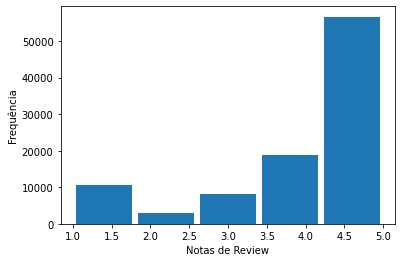

In [64]:
plt.hist(dataset["review_score"],5,rwidth=0.9)
#dataset["review_score"].plot(kind="hist")
plt.ylabel("Frequência")
plt.xlabel("Notas de Review")

In [145]:
reviews = dataset["review_score"].value_counts()
sizes = []
for i in range (1,len(reviews)+1):
    sizes.append((reviews[i]/len(dataset["review_score"]))*100)

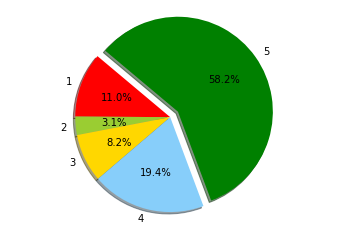

In [154]:
labels = ["1","2","3","4","5"]
colors = ["red", "yellowgreen", "gold", "lightskyblue","green"]
explode = (0, 0, 0, 0,0.1)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0.5, 0, 'Preço')

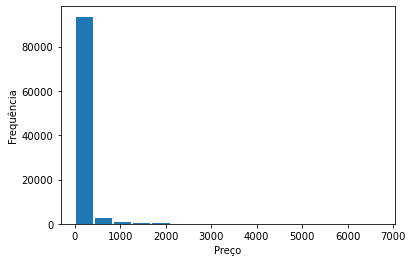

In [76]:
plt.hist(dataset["price"],16,rwidth=0.9)
#dataset["review_score"].plot(kind="hist")
plt.ylabel("Frequência")
plt.xlabel("Preço")

Text(0.5, 0, 'Frete')

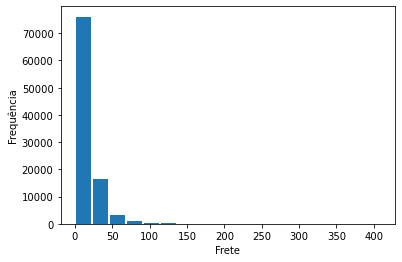

In [73]:
plt.hist(dataset["freight_value"],18,rwidth=0.9)
#dataset["freight_value"].plot(kind="hist")
plt.ylabel("Frequência")
plt.xlabel("Frete")

Text(0.5, 0, 'Atrasos')

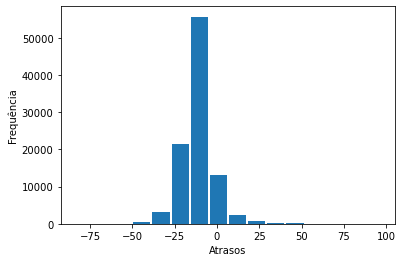

In [81]:
plt.hist(dataset["days_late"],16,rwidth=0.9)
plt.ylabel("Frequência")
plt.xlabel("Atrasos")

Text(0.5, 0, 'Delivery')

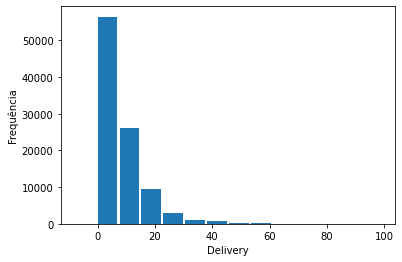

In [84]:
plt.hist(dataset["delivery_days"],14,rwidth=0.9)
plt.ylabel("Frequência")
plt.xlabel("Delivery")

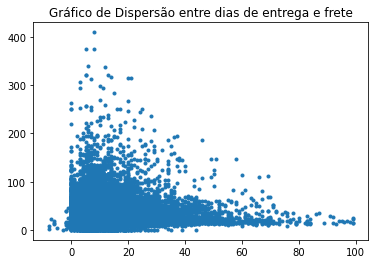

In [101]:
plt.scatter(dataset["delivery_days"],dataset["freight_value"], marker=".")
plt.title("Gráfico de Dispersão entre dias de entrega e frete")
plt.show()

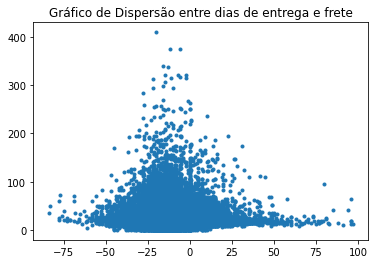

In [100]:
plt.scatter(dataset["days_late"],dataset["freight_value"], marker=".")
plt.title("Gráfico de Dispersão entre dias de entrega e frete")
plt.show()

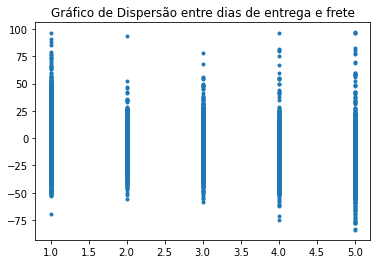

In [99]:
plt.scatter(dataset["review_score"],dataset["days_late"],marker=".")
plt.title("Gráfico de Dispersão entre dias de entrega e frete")
plt.show()

In [ ]:
plt.scatter(dataset["review_score"],dataset["days_late"])
plt.title("Gráfico de Dispersão entre dias de entrega e frete")
plt.show()

## Teste de Aderência Qui-Quadrado

In [155]:
from scipy.stats import chi2_contingency

In [157]:
tabcross = pd.crosstab(dataset["review_score"], dataset["price"])
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["days_late"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
print("Review e Preço")
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Review e Preço
Qui-quadrado:  24861.251971524413
p-valor:  8.37576701102523e-12


In [158]:
tabcross = pd.crosstab(dataset["review_score"], dataset["freight_value"])
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["days_late"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
print("Review e Frete")
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Review e Frete
Qui-quadrado:  31121.637453806557
p-valor:  6.855571573502225e-70


In [160]:
tabcross = pd.crosstab(dataset["review_score"], dataset["days_late"])
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["days_late"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
print("Review e Atraso")
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Review e Atraso
Qui-quadrado:  23884.26504491799
p-valor:  0.0


In [159]:
tabcross = pd.crosstab(dataset["review_score"], dataset["delivery_days"])
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["days_late"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
print("Review e Delivery")
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Review e Delivery
Qui-quadrado:  15477.459805216422
p-valor:  0.0


# Código Antigo

In [13]:
# custom = customers_orders.groupby(["review_score","order_status"]).agg({"code_seller_city":"count"})
means = dataset.groupby(["seller_state"]).agg({"review_score":"mean"})
counts = dataset.groupby(["seller_state"]).agg({"review_score":"count"})
stds = dataset.groupby(["seller_state"]).agg({"review_score":"std"})
mins = dataset.groupby(["seller_state"]).agg({"review_score":"min"})
maxs = dataset.groupby(["seller_state"]).agg({"review_score":"max"})
#modes = dataset.groupby(["seller_state"]).agg({"review_score":"mode"})


means.rename({"review_score":"mean"}, axis="columns", inplace=True)
counts.rename({"review_score":"count"}, axis="columns", inplace=True)
stds.rename({"review_score":"std"}, axis="columns", inplace=True)
mins.rename({"review_score":"min"}, axis="columns", inplace=True)
maxs.rename({"review_score":"max"}, axis="columns", inplace=True)
#modes.rename({"review_score":"mode"}, axis="columns", inplace=True)

stds.replace(np.nan,0, inplace=True)
means.reset_index(inplace=True)
counts.reset_index(inplace=True)
stds.reset_index(inplace=True)
mins.reset_index(inplace=True)
maxs.reset_index(inplace=True)
#modes.reset_index(inplace=True)

result = pd.merge(means, counts, how="inner", on="seller_state")
result = pd.merge(result, stds, how="inner", on="seller_state")
result = pd.merge(result, mins, how="inner", on="seller_state")
result = pd.merge(result, maxs, how="inner", on="seller_state")
result = pd.merge(result, modes, how="inner", on="seller_state")
result[["seller_state", "mean",	"std", "min", "max","mode"]].plot()
print(result[["seller_state", "count",  "mean",	"std", "min", "max","mode"]])
# hipotese no acre mais demorado a entrega e mais caro a entrega consequentemente seria a avaliação é baixa
# quantidade de vendas baixo 
# custom.reset_index(inplace=True)



AttributeError: 'SeriesGroupBy' object has no attribute 'mode'

   customer_state  count      mean       std  min  max
0              AC     80  4.075000  1.309894    1    5
1              AL    407  3.766585  1.522269    1    5
2              AM    144  4.215278  1.246888    1    5
3              AP     67  4.194030  1.062285    1    5
4              BA   3301  3.877310  1.431392    1    5
5              CE   1312  3.874238  1.456789    1    5
6              DF   2102  4.082303  1.340037    1    5
7              ES   1990  4.049246  1.346685    1    5
8              GO   1982  4.057013  1.331966    1    5
9              MA    726  3.760331  1.507818    1    5
10             MG  11397  4.158638  1.285130    1    5
11             MS    702  4.129630  1.322042    1    5
12             MT    892  4.108744  1.301149    1    5
13             PA    946  3.858351  1.464580    1    5
14             PB    524  4.024809  1.383236    1    5
15             PE   1624  4.013547  1.404969    1    5
16             PI    480  3.914583  1.435821    1    5
17        

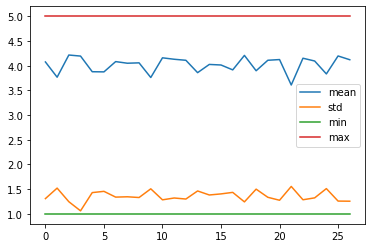

In [7]:
# custom = customers_orders.groupby(["review_score","order_status"]).agg({"customer_state":"count"})
means = dataset.groupby(["customer_state"]).agg({"review_score":"mean"})
counts = dataset.groupby(["customer_state"]).agg({"review_score":"count"})
stds = dataset.groupby(["customer_state"]).agg({"review_score":"std"})
mins = dataset.groupby(["customer_state"]).agg({"review_score":"min"})
maxs = dataset.groupby(["customer_state"]).agg({"review_score":"max"})

means.rename({"review_score":"mean"}, axis="columns", inplace=True)
counts.rename({"review_score":"count"}, axis="columns", inplace=True)
stds.rename({"review_score":"std"}, axis="columns", inplace=True)
mins.rename({"review_score":"min"}, axis="columns", inplace=True)
maxs.rename({"review_score":"max"}, axis="columns", inplace=True)

stds.replace(np.nan,0, inplace=True)
means.reset_index(inplace=True)
counts.reset_index(inplace=True)
stds.reset_index(inplace=True)
mins.reset_index(inplace=True)
maxs.reset_index(inplace=True)

result = pd.merge(means, counts, how="inner", on="customer_state")
result = pd.merge(result, stds, how="inner", on="customer_state")
result = pd.merge(result, mins, how="inner", on="customer_state")
result = pd.merge(result, maxs, how="inner", on="customer_state")
result[["customer_state", "mean",	"std", "min", "max"]].plot()
print(result[["customer_state", "count", "mean",	"std", "min", "max"]])
# hipotese no acre mais demorado a entrega e mais caro a entrega consequentemente seria a avaliação é baixa
##  quantidade de vendas baixo 


# hipotese tempo de entregar tendencia as notas das reviews



        product_category_name      mean       std  min  max
0   agro_industria_e_comercio  4.021978  1.325300    1    5
1                   alimentos  4.270642  1.250346    1    5
2           alimentos_bebidas  4.380090  1.035884    1    5
3                       artes  4.046154  1.367111    1    5
4          artes_e_artesanato  4.136364  1.424127    1    5
..                        ...       ...       ...  ...  ...
68    sinalizacao_e_seguranca  4.102190  1.290717    1    5
69   tablets_impressao_imagem  4.173333  1.155169    1    5
70                  telefonia  4.008446  1.349114    1    5
71             telefonia_fixa  3.901869  1.455021    1    5
72      utilidades_domesticas  4.150433  1.293169    1    5

[73 rows x 5 columns]


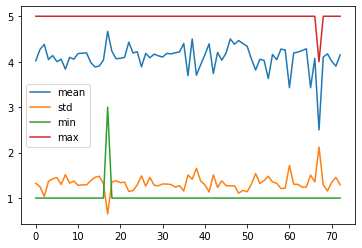

In [10]:
means = dataset.groupby(["product_category_name"]).agg({"review_score":"mean"})
counts = dataset.groupby(["product_category_name"]).agg({"review_score":"count"})
stds = dataset.groupby(["product_category_name"]).agg({"review_score":"std"})
mins = dataset.groupby(["product_category_name"]).agg({"review_score":"min"})
maxs = dataset.groupby(["product_category_name"]).agg({"review_score":"max"})

means.rename({"review_score":"mean"}, axis="columns", inplace=True)
counts.rename({"review_score":"count"}, axis="columns", inplace=True)
stds.rename({"review_score":"std"}, axis="columns", inplace=True)
mins.rename({"review_score":"min"}, axis="columns", inplace=True)
maxs.rename({"review_score":"max"}, axis="columns", inplace=True)

stds.replace(np.nan,0, inplace=True)
means.reset_index(inplace=True)
counts.reset_index(inplace=True)
stds.reset_index(inplace=True)
mins.reset_index(inplace=True)
maxs.reset_index(inplace=True)

result = pd.merge(means, counts, how="inner", on="product_category_name")
result = pd.merge(result, stds, how="inner", on="product_category_name")
result = pd.merge(result, mins, how="inner", on="product_category_name")
result = pd.merge(result, maxs, how="inner", on="product_category_name")
result[["product_category_name", "mean",	"std", "min", "max"]].plot()
print(result[result["std"] > 0][["product_category_name", "mean",	"std", "min", "max"]])

Text(0.5, 1.0, 'Gráfico de Correlação')

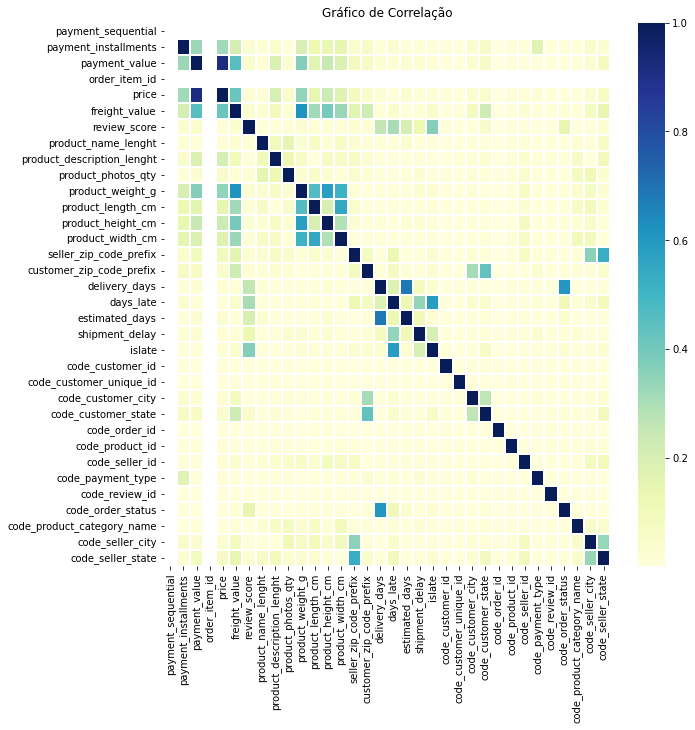

In [19]:
corrmat = abs(dataset.corr(method="pearson"))
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,ax = ax, cmap="YlGnBu", linewidths = 0.1)
plt.title("Gráfico de Correlação")

<AxesSubplot:>

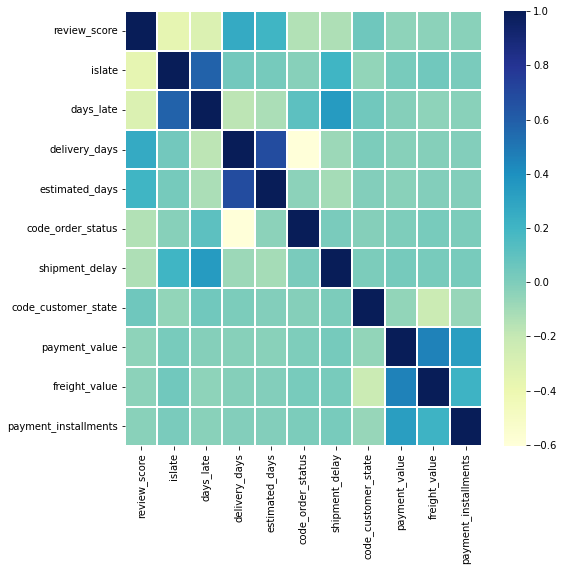

In [21]:
k = 11
cols = corrmat.nlargest(k, "review_score")["review_score"].index
#cols = ["review_score","days_late", "delivery_days", "payment_value", "freight_value", ]
cm = np.corrcoef(dataset[cols].values.T) 
f, ax = plt.subplots(figsize =(8, 8)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values)


In [22]:
print(corrmat["review_score"].sort_values(ascending=False))

review_score                  1.000000
islate                        0.363972
days_late                     0.305357
delivery_days                 0.260464
estimated_days                0.199110
code_order_status             0.144221
shipment_delay                0.128709
code_customer_state           0.048107
payment_value                 0.045771
freight_value                 0.038388
payment_installments          0.032275
product_weight_g              0.030391
seller_zip_code_prefix        0.025878
code_seller_state             0.023960
product_height_cm             0.023011
product_length_cm             0.019389
customer_zip_code_prefix      0.017691
product_photos_qty            0.013302
product_width_cm              0.012909
price                         0.012387
product_description_lenght    0.011300
product_name_lenght           0.009051
code_seller_id                0.007420
code_product_id               0.005422
code_seller_city              0.004957
code_customer_id         

In [25]:
#from scipy import stats

In [19]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["days_late"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.3052196029474731  with a P-value of P = 0.0


In [21]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["estimated_days"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.05097777191159633  with a P-value of P = 1.5997703361197797e-59


In [22]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["delivery_days"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.2550465885521451  with a P-value of P = 0.0


In [24]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["freight_value"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.040007047905071105  with a P-value of P = 2.5465409161289673e-37


In [26]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["islate"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.36305962749112936  with a P-value of P = 0.0


In [27]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["shipment_delay"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.12730503276313015  with a P-value of P = 0.0


In [28]:
#pearson_coef, p_value = stats.pearsonr(dataset["review_score"], dataset["payment_value"])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.04438926878387298  with a P-value of P = 1.5004370997295997e-45


In [65]:
from scipy.stats import chi2_contingency

Qui-quadrado:  23884.26504491799
p-valor:  0.0


In [67]:
tabcross = pd.crosstab(dataset["review_score"], dataset["estimated_days"])
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["estimated_days"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  327966.3267325743
p-valor:  1.011595564886822e-23


In [68]:
tabcross = pd.crosstab(dataset["review_score"], dataset["delivery_days"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["delivery_days"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  364074.3166817173
p-valor:  0.6569894917459138


In [69]:
tabcross = pd.crosstab(dataset["review_score"], dataset["freight_value"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  31121.637453806557
p-valor:  6.855571573502225e-70


In [70]:
tabcross = pd.crosstab(dataset["review_score"], dataset["shipment_delay"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  4043.1289209563975
p-valor:  0.0


In [71]:
tabcross = pd.crosstab(dataset["review_score"], dataset["payment_value"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  118183.24964916766
p-valor:  5.121743175827002e-41


In [72]:
tabcross = pd.crosstab(dataset["review_score"], dataset["product_photos_qty"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  147.14872743418132
p-valor:  4.359349783597789e-07


In [73]:
tabcross = pd.crosstab(dataset["review_score"], dataset["product_description_lenght"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  12971.683704290543
p-valor:  5.93675171915881e-14


In [74]:
tabcross = pd.crosstab(dataset["review_score"], dataset["product_weight_g"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  10063.763938976714
p-valor:  2.682664000047964e-22


In [75]:
tabcross = pd.crosstab(dataset["review_score"], dataset["price"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  24861.251971524413
p-valor:  8.37576701102523e-12


In [76]:
tabcross = pd.crosstab(dataset["review_score"], dataset["payment_installments"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  274.52528555173683
p-valor:  4.812532686028149e-21


In [77]:
tabcross = pd.crosstab(dataset["review_score"], dataset["payment_sequential"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  0.0
p-valor:  1.0


In [78]:
tabcross = pd.crosstab(dataset["review_score"], dataset["product_name_lenght"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  385.4005439479461
p-valor:  1.2310816109919991e-07


In [79]:
tabcross = pd.crosstab(dataset["review_score"], dataset["customer_zip_code_prefix"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  62803.62080884253
p-valor:  7.782043917661565e-18


In [80]:
tabcross = pd.crosstab(dataset["review_score"], dataset["code_payment_type"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  23.749671519214363
p-valor:  0.021995206818259234


In [81]:
tabcross = pd.crosstab(dataset["review_score"], dataset["code_customer_state"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  1062.7539182950118
p-valor:  1.1872371550741765e-158


In [88]:
tabcross = pd.crosstab(dataset["review_score"], dataset["code_seller_state"])
chi2,p,dof,exp = chi2_contingency(tabcross.values)
#chi2,p,dof,exp = chi2_contingency(dataset["review_score"], dataset["freight_value"])
print("Qui-quadrado: ",chi2)
print("p-valor: ",p)

Qui-quadrado:  275.4905368880428
p-valor:  3.448617542579582e-21
